# Introduction


**This Project for Natural Language Processing /Data Science Track,Digital Egypt Pioneers Initiative (DEPI) - Egypt**

   


Welcome to this notebook!
This project focuses on building a Sentiment Analysis system using English text comments extracted from social media platforms such as YouTube and Twitter. The goal is to apply data science and machine learning techniques to understand users' emotional expressions.

We make use of two diverse and rich datasets:

Sentiment140 Dataset – 1 Million Tweets

YouTube Statistics Dataset

These datasets contain real-life expressions and interactions in different social contexts—ranging from direct feedback, emotional sharing, to casual conversations—allowing us to explore how people express positive and negative sentiments.

🎯 Project Goal:
To develop a binary sentiment classification model that can identify whether a given English text comment expresses a positive or negative sentiment.

📌 This notebook covers:

-Data Collection & Exploratory Analysis

-Data Cleaning & Text Preprocessing

-Feature Representation using TF-IDF

-Training Machine Learning Models (Logistic Regression, Naive Bayes, SVM, etc.)

-Performance Evaluation & Comparison

-Testing on Real Comments

-Final Observations & Insights

This project represents a step toward leveraging AI to better understand human language and emotions — all within the real-world context of social media content analysis.



# 1. Setup the notebook

## 1.1 Loading Required Libraries

In [14]:
!pip install scikit-learn
!pip install gensim

In [15]:
# download puntk
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# download veraged_perceptron_tagger
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [17]:
# download
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [18]:
# download
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#Importing all Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import gensim
import nltk
nltk.download('punkt')
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns
from plotly import graph_objs as go
from wordcloud import WordCloud
import pickle
import warnings
warnings.filterwarnings("ignore")
nltk.download('wordnet')
nltk.download('wordnet2022')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


## 1.2 Defining the paths to the datasets

In [20]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Gathering & Exploratory Data Analysis

## 2.1 Getting the datasets into work

In [22]:
# Start reading the datasets from the specified paths
youtube_comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/text-sentiment-analysis-with-speech-recognition/comments.csv')
sentiment_tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/text-sentiment-analysis-with-speech-recognition/dataset.csv')

## 2.2 Getting youtube statistics dataset

In [23]:
youtube_comments.head()

Unnamed: 0     Video ID                                            Comment  \
0           0  wAZZ-UWGVHI  Let's not forget that Apple Pay in 2014 requir...   
1           1  wAZZ-UWGVHI  Here in NZ 50% of retailers don’t even have co...   
2           2  wAZZ-UWGVHI  I will forever acknowledge this channel with t...   
3           3  wAZZ-UWGVHI  Whenever I go to a place that doesn’t take App...   
4           4  wAZZ-UWGVHI  Apple Pay is so convenient, secure, and easy t...   

   Likes  Sentiment  
0   95.0        1.0  
1   19.0        0.0  
2  161.0        2.0  
3    8.0        0.0  
4   34.0        2.0

I'll try to bar the number of samples for each sentiment, note that **0, 1, 2 for Negative, Neutral and Positive Sentiments** respectively.
> Sentiment: The sentiment of the comment. A value of 0 represents a negative sentiment, while values of 1 or 2 represent neutral and positive sentiments respectively.

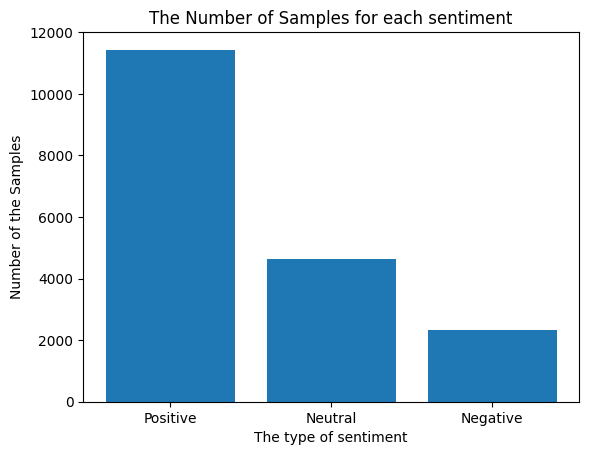

In [24]:
# the number of Samples for each sentiment
counting = youtube_comments.Sentiment.value_counts()
plt.bar(['Positive', 'Neutral', 'Negative'],counting)
plt.xlabel('The type of sentiment')
plt.ylabel('Number of the Samples')
plt.title("The Number of Samples for each sentiment")
plt.show()

Since our problem is *Binary Classification* , i'll drop the **Neutral Sentiment** , there is no need for this class at our problem .

In [25]:
# Getting ONLY the Comment & Sentiment columns for further processing
First_corpus = pd.DataFrame(columns=['Text','Label'])
First_corpus['Text'],First_corpus['Label'] = youtube_comments['Comment'],youtube_comments['Sentiment']

In [26]:
# Dropping the Neutral Sentiment rows, and assign the Positive class (2.0) to (1.0) instead
First_corpus.drop(First_corpus[First_corpus['Label'] == 1.0].index, inplace=True)
First_corpus.loc[First_corpus['Label'] == 2.0, 'Label'] = 1.0

## 2.3 Analyzing youtube statistics dataset

In [27]:
# show First_corpus
First_corpus

Text  Label
1      Here in NZ 50% of retailers don’t even have co...    0.0
2      I will forever acknowledge this channel with t...    1.0
3      Whenever I go to a place that doesn’t take App...    0.0
4      Apple Pay is so convenient, secure, and easy t...    1.0
6      We only got Apple Pay in South Africa in 2020/...    1.0
...                                                  ...    ...
18402  I come from a physics background, and usually ...    1.0
18404  I really like the point about engineering tool...    1.0
18405  I’ve just started exploring this field. And th...    1.0
18407  Hey Daniel, just discovered your channel a cou...    1.0
18408  This is great. Focus is key. A playful approac...    1.0

[13770 rows x 2 columns]

In [28]:
# First_corpus describe
First_corpus.Text.describe()

count                                                 13770
unique                                                13462
top       One of the best thing about Dude is that he\r\...
freq                                                     10
Name: Text, dtype: object

It shows that there is some **DUPLICATED TEXTS** which is there is no need for them, they will be dropped .

In [29]:
# Drop duplicates
First_corpus.drop_duplicates(inplace=True)
print(First_corpus.Text.is_unique)
print(f'Number of Samples after removing duplication: {len(First_corpus)}')

True
Number of Samples after removing duplication: 13462


looks good now ! now trying to drop null values/texts if any .

In [30]:
# Check for null values in the 'Text' and 'Label' columns
First_corpus.isnull().sum()

Text     0
Label    0
dtype: int64

In [31]:
# Number of Samples
print(f'Number of Samples: {len(First_corpus)}')

Number of Samples: 13462


There is no Null values in the text, which is good indicator , so our dataset is READY FOR THE NEXT STAGE ***DATA CLEANING & PREPARATION***

## 2.4 Getting sentiment dataset with 1 million tweets

In [32]:
sentiment_tweets.head(10)

Text Language        Label
0  @Charlie_Corley @Kristine1G @amyklobuchar @Sty...       en    litigious
1  #BadBunny: Como dos gotas de agua: Joven se di...       es     negative
2  https://t.co/YJNiO0p1JV Flagstar Bank disclose...       en    litigious
3  Rwanda is set to host the headquarters of Unit...       en     positive
4  OOPS. I typed her name incorrectly (today’s br...       en    litigious
5  It sucks for me since I'm focused on the natur...       en     negative
6  @en_font Treballar a l’obra a partir dels 19 a...       ca     negative
7  @ShawnTarloff @itsmieu you can also relate thi...       en  uncertainty
8  Social Security. Constant political crises dis...       en     negative
9  @FilmThePoliceLA A broken rib can puncture a l...       en     negative

It is a little bit different here about this dataset ! since the dataset is divided into **Language-based** texts, the *Non-English* texts will be dropped for our problem .

In [33]:
# Dropping Non-English texts from the datasets
print(f"The number of samples before dropping Non-English texts: {len(sentiment_tweets)}")
sentiment_tweets = sentiment_tweets[sentiment_tweets['Language'] == 'en']
print(f"The number of samples AFTER dropping Non-English texts: {len(sentiment_tweets)}")

The number of samples before dropping Non-English texts: 937854
The number of samples AFTER dropping Non-English texts: 871310


looks like the subset of the dataset  (*English Texts*) is HUGE ! that's actually true and referred in the [Dataset Card](https://www.kaggle.com/datasets/tariqsays/sentiment-dataset-with-1-million-tweets) .

Let's see how the Sentiments looks like ...

**Note !** the dataset contains *4 SENTIMENTS CATEGORIES* {Positive, Negative, Litigious, Uncertainty}
> The tweets have been annotated with 4 different categories(positive,negative,uncertainty,litigious) and they can be used to detect sentiment .

In [34]:
# show sentiment_tweets
sentiment_tweets

Text Language      Label
0       @Charlie_Corley @Kristine1G @amyklobuchar @Sty...       en  litigious
2       https://t.co/YJNiO0p1JV Flagstar Bank disclose...       en  litigious
3       Rwanda is set to host the headquarters of Unit...       en   positive
4       OOPS. I typed her name incorrectly (today’s br...       en  litigious
5       It sucks for me since I'm focused on the natur...       en   negative
...                                                   ...      ...        ...
937849            @Juice_Lemons in the dark. it’s so good       en   positive
937850  8.SSR &amp; Disha Salian case should be solved...       en   negative
937851  *ACCIDENT:  Damage Only* - Raleigh Fire Depart...       en   negative
937852  @reblavoie So happy for her! She’s been incred...       en   positive
937853                         I'm lost and I'm found but       en   negative

[871310 rows x 3 columns]

# **The Number of Samples for each sentiment**

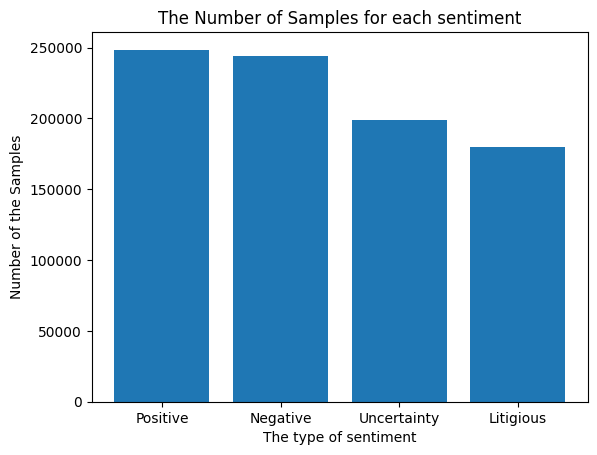

In [35]:
# The Number of Samples for each sentiment
counting = sentiment_tweets.Label.value_counts()
plt.bar(['Positive','Negative','Uncertainty','Litigious'],counting)
plt.xlabel('The type of sentiment')
plt.ylabel('Number of the Samples')
plt.title("The Number of Samples for each sentiment")
plt.show()

As mentioned before, there is no need for any other sentiment category than {Positive, Negative}, so the others will be dropped .

In [36]:
# Labelling the Positive and Negative Classes into 1.0 & 0.0 respectively
Second_corpus = pd.DataFrame(columns=['Text','Label'])
sentiment_tweets = sentiment_tweets[sentiment_tweets['Language'] == 'en']
sentiment_tweets.loc[sentiment_tweets['Label'] == 'positive','Label'] = 1.0
sentiment_tweets.loc[sentiment_tweets['Label'] == 'negative','Label'] = 0.0

# Dropping the other Classes
print(f'The number of samples before dropping: {len(sentiment_tweets)}')
sentiment_tweets.drop(sentiment_tweets[(sentiment_tweets['Label'] == 'uncertainty') | (sentiment_tweets['Label'] == 'litigious')].index
                     ,inplace=True)
print(f'The number of samples AFTER dropping: {len(sentiment_tweets)}')

# Getting only Text & Label columns
Second_corpus['Text'] , Second_corpus['Label'] = sentiment_tweets['Text'] , sentiment_tweets['Label']

The number of samples before dropping: 871310
The number of samples AFTER dropping: 492662


## 2.5 Analyzing the tweets sentiments dataset

In [37]:
Second_corpus.head(10)

Text Label
3   Rwanda is set to host the headquarters of Unit...   1.0
5   It sucks for me since I'm focused on the natur...   0.0
8   Social Security. Constant political crises dis...   0.0
9   @FilmThePoliceLA A broken rib can puncture a l...   0.0
10  @jacobringenwald @aKeithWatts @CountDankulaTV ...   0.0
11  @NZ_HK_SU @telebusiness My question was rhetor...   0.0
12  Wimbledon: Nick Kyrgios admits spitting toward...   1.0
13  is booktwt a thing? if so thats her and she sp...   1.0
16  @roipaee @joe98100959 @Formula1game @redbullra...   0.0
17  🤩 Power back on (1855749):  North VI in Ladysm...   0.0

In [38]:
# descripe Second_corpus
Second_corpus.Text.describe()

count                          492662
unique                         488600
top       @FlylightsTech Good project
freq                               73
Name: Text, dtype: object

As the same before, here are **DUPLICATED TEXTS** , it is time to remove it

In [39]:
# Drop duplicates
Second_corpus.drop_duplicates(inplace=True)
print(f'Number of Samples after removing duplication: {len(Second_corpus)}')

Number of Samples after removing duplication: 490393


Now counting the **NULL VALUES IF EXIST** and try to drop them all .

In [40]:
# Check for null values in the 'Text' and 'Label' columns
Second_corpus.isnull().sum()

Text     0
Label    0
dtype: int64

## 2.6 Getting them all Together

In [41]:
# Concatenating the First & Second corpuses into one df
df = pd.concat([First_corpus,Second_corpus],ignore_index=True)

# counting positive & negative comments
print(df.Label.value_counts())

print("_____")

print(f'The number of total samples after concatenating: {len(df)}')
df.head(10)

Label
1.0    258395
0.0    245460
Name: count, dtype: int64
_____
The number of total samples after concatenating: 503855


Text Label
0  Here in NZ 50% of retailers don’t even have co...   0.0
1  I will forever acknowledge this channel with t...   1.0
2  Whenever I go to a place that doesn’t take App...   0.0
3  Apple Pay is so convenient, secure, and easy t...   1.0
4  We only got Apple Pay in South Africa in 2020/...   1.0
5  In the United States, we have an abundance of ...   1.0
6  Wow, you really went to town on the PSU test r...   1.0
7  The lab is the most exciting thing in IT I've ...   1.0
8  Linus, I'm an engineer and love the LMG conten...   1.0
9  There used to be a time where Linus was the sm...   1.0

The distribution of the dataset classes {Positive, Negative} will be examined, *if the data is imbalanced*, an technique will be applied to override this .

In [42]:
labels = df.groupby(df['Label']).size().index
values = df.groupby(df['Label']).size().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6,title='Distribution of Classes in the dataset')])
fig.show()

Looks like the Dataset is **BALANCED** so, NOW WE ARE READY FOR THE NEXT STAGE !

# 3. Data Preparation & Cleaning

In [43]:
# check nulls
df.isnull().sum()

Text     0
Label    0
dtype: int64

In [44]:
# Trying to remove any duplication & null values after concatenating
print(f"The total number of samples {len(df)}")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f"The total number of samples after dropping some {len(df)}")

The total number of samples 503855
The total number of samples after dropping some 503855


In [45]:
# show df
df

Text Label
0       Here in NZ 50% of retailers don’t even have co...   0.0
1       I will forever acknowledge this channel with t...   1.0
2       Whenever I go to a place that doesn’t take App...   0.0
3       Apple Pay is so convenient, secure, and easy t...   1.0
4       We only got Apple Pay in South Africa in 2020/...   1.0
...                                                   ...   ...
503850            @Juice_Lemons in the dark. it’s so good   1.0
503851  8.SSR &amp; Disha Salian case should be solved...   0.0
503852  *ACCIDENT:  Damage Only* - Raleigh Fire Depart...   0.0
503853  @reblavoie So happy for her! She’s been incred...   1.0
503854                         I'm lost and I'm found but   0.0

[503855 rows x 2 columns]

It is expected to face some troubles using Social Media comment & tweets for training, which is the dataset may contains:

1. **Mentions @**

2. **Hashtags #**

3. **Emojies and Flags**

4. **Links & URLs**

5. **Symbols**

6. **Digits which is useless at our problem**

7. **Duplicated characters within the same word**

8. **Abbreviations**

***It is all useless for our problem***

In [46]:
# Defining a function that remove the following
def cleaning(text):
    text = re.sub(r'#\w+','', text)                 # Removing Hashtags
    text = re.sub(r'http\S+','', text)              # Removing Links & URLs
    text = re.sub(r'@\w+','', text)                 # Removing Mentions
    text = re.sub('[()!?.\';:<>`$%’,]', '', text)   # Removing Punctuations with different forms
    text = re.sub(r'[^a-zA-Z]',' ', text)           # Removing digits
    text = re.sub(r'([a-zA-Z])\1{2,}','\1', text)   # Reduce duplicated character (> 3) to only one
    text = text.lower()                             # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)                # Replace multiple spaces with a single space
    text = text.strip()                             # Remove leading/trailing spaces
    return text

# Defining list of Abbreviations to be expanded to its original form
abbreviations = {'fyi': 'for your information',
                 'lol': 'laugh out loud',
                 'loza': 'laughs out loud',
                 'lmao': 'laughing',
                 'rofl': 'rolling on the floor laughing',
                 'vbg': 'very big grin',
                 'xoxo': 'hugs and kisses',
                 'xo': 'hugs and kisses',
                 'brb': 'be right back',
                 'tyt': 'take your time',
                 'thx': 'thanks',
                 'abt': 'about',
                 'bf': 'best friend',
                 'diy': 'do it yourself',
                 'faq': 'frequently asked questions',
                 'fb': 'facebook',
                 'idk': 'i don\'t know',
                 'asap': 'as soon as possible',
                 'syl': 'see you later',
                 'nvm': 'never mind',
                 'frfr':'for real for real',
                 'istg':'i swear to god',
    }

In [47]:
# Putting all together
def DataCleaning(corpus):
    corpus['Text'] = corpus['Text'].apply(cleaning)           # Calling cleaning function (1-7)

    for abbreviation, full_form in abbreviations.items():     # Expanding the Abbreviations
        corpus['Text'] = corpus['Text'].str.replace(abbreviation, full_form)
    return corpus

In [48]:
# Apply DataCleaning function
df = DataCleaning(df)

In [49]:
print(f"The total number of samples: {len(df)}")
df.drop_duplicates(inplace=True)                # Dropping duplicated texts if exist after Cleaning

df.dropna(inplace=True)                         # Dropping Null values if exist after Cleaning
print(f"The total number of samples after removal: {len(df)}")

The total number of samples: 503855
The total number of samples after removal: 474226


In [50]:
# df describe
df.Text.describe()

count         474226
unique        472399
top       good night
freq               2
Name: Text, dtype: object

In [51]:
# Trying to remove any duplication & null values after concatenating
print(f"The total number of samples {len(df)}")

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f"The total number of samples after dropping some {len(df)}")

The total number of samples 474226
The total number of samples after dropping some 474226


Using **WordCloud** the most frequent words at *The whole dataset, for positive class and for the negative class* will be shown .

(-0.5, 1999.5, 1599.5, -0.5)

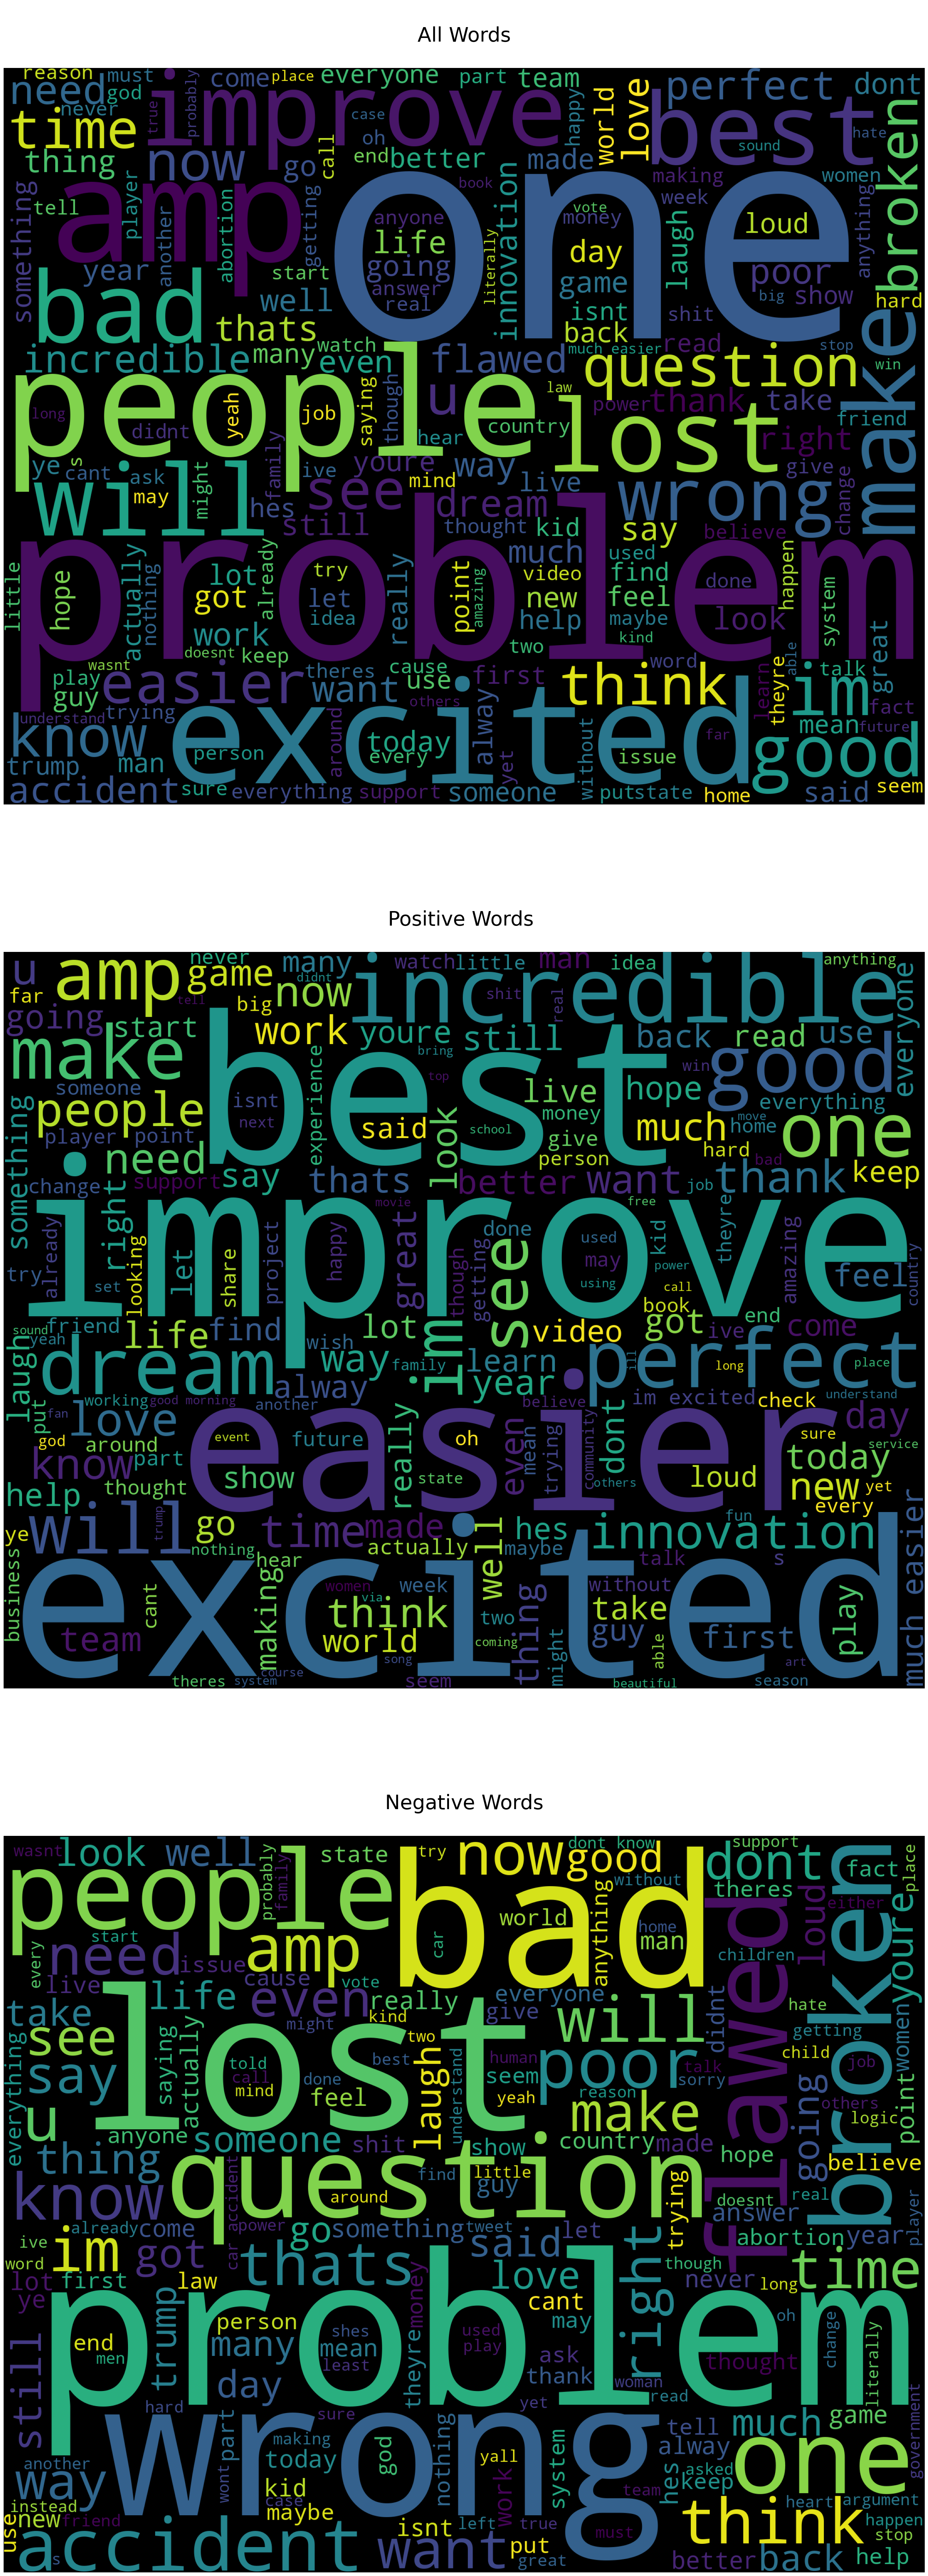

In [52]:
fig, ax = plt.subplots(3, 1, figsize  = (90,90))
all_words = WordCloud(
                          background_color='black',
                          width=2000,
                          height=1600
                         ).generate(' '.join(df['Text']))

positive_words =WordCloud(
                          background_color='black',
                          width=2000,
                          height=1600
                         ).generate(" ".join(df[df['Label']==1.0]['Text']))

negative_words =WordCloud(
                          background_color='black',
                          width=2000,
                          height=1600
                         ).generate(" ".join(df[df['Label']==0.0]['Text']))

ax[0].imshow(all_words)
ax[0].set_title('\nAll Words\n', fontsize=40)
ax[0].axis('off')
print('\n')

ax[1].imshow(positive_words)
ax[1].set_title('\nPositive Words \n',fontsize=40)
ax[1].axis('off')
print('\n')

ax[2].imshow(negative_words)
ax[2].set_title('\nNegative Words\n',fontsize=40)
ax[2].axis('off')

# 4. Data Preprocessing

## 4.1 Removing Stop Words

Since the stopwords has no effect at our problem, it will be removed using **remove_stopwords function from gensim library (for wide range of stop words)**

Stopwords are common words like:

"the", "is", "at", "which", "on", "and", "a"

In [53]:
# remove_stopwords
df['Text'] = df['Text'].apply(remove_stopwords)

## 4.2 Tokenization

Tokenization means splitting text into smaller parts.

Basic tokenization will be applied to the dataset, **Using word_tokenize from nltk library**

In [54]:
# import nltk and download punkt
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [55]:
# apply Tokenized
df['Tokenized'] = df['Text'].apply(word_tokenize)

In [56]:
df

Text Label  \
0       nz retailers dont contactless credit card mach...   0.0   
1       forever acknowledge channel help lessons ideas...   1.0   
2       place doesnt apple pay doesnt happen drag cont...   0.0   
3       apple pay convenient secure easy use korean ja...   1.0   
4              got apple pay south africa widely accepted   1.0   
...                                                   ...   ...   
503850                                          dark good   1.0   
503851  ssr amp disha salian case solved amp drugs car...   0.0   
503852      accident damage raleigh department fairway dr   0.0   
503853                              happy shes incredible   1.0   
503854                                         im lost im   0.0   

                                                Tokenized  
0       [nz, retailers, dont, contactless, credit, car...  
1       [forever, acknowledge, channel, help, lessons,...  
2       [place, doesnt, apple, pay, doesnt, happen, dr...  
3       [apple, pay, convenient, secure, easy, use, ko...  
4       [got, apple, pay, south, africa, widely, accep...  
...                                                   ...  
503850                                       [dark, good]  
503851  [ssr, amp, disha, salian, case, solved, amp, d...  
503852  [accident, damage, raleigh, department, fairwa...  
503853                          [happy, shes, incredible]  
503854                                     [im, lost, im]  

[474226 rows x 3 columns]

## 4.3 Lemmatization with POS

Using lemmatization technique with Part-of-Speech (POS) to reduce the words to its original form, depend on the where the word is !

This technique especially to make sure that every word is reduced to its equivalent correct form, rather than using Normal Lemmatization .

In [57]:
# Defining all Required Paramaters for WordNet Lemmatizer (POS Tags Reducing - POS Tagging)
lemmatizer = WordNetLemmatizer()
# pos_tagger function to Reduce Nouns to N, Adjectives to J ... etc , for further processing
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatization(text):
    new_sen = []
    pos_tagged = pos_tag(text)
    wordnet_tagged = list(map(lambda x: (x[0],pos_tagger(x[1])), pos_tagged)) # POS Tagging & Reducing
    for word, tag in wordnet_tagged:
        if tag is None:
            new_sen.append(word)
        else:
            new_sen.append(lemmatizer.lemmatize(word,tag))                   # Lemmatizing

    return new_sen

In [58]:
# Lemmatizing the Corpus
df['Tokenized'] = df['Tokenized'].apply(lemmatization)

In [59]:
df

Text Label  \
0       nz retailers dont contactless credit card mach...   0.0   
1       forever acknowledge channel help lessons ideas...   1.0   
2       place doesnt apple pay doesnt happen drag cont...   0.0   
3       apple pay convenient secure easy use korean ja...   1.0   
4              got apple pay south africa widely accepted   1.0   
...                                                   ...   ...   
503850                                          dark good   1.0   
503851  ssr amp disha salian case solved amp drugs car...   0.0   
503852      accident damage raleigh department fairway dr   0.0   
503853                              happy shes incredible   1.0   
503854                                         im lost im   0.0   

                                                Tokenized  
0       [nz, retailer, dont, contactless, credit, card...  
1       [forever, acknowledge, channel, help, lesson, ...  
2       [place, doesnt, apple, pay, doesnt, happen, dr...  
3       [apple, pay, convenient, secure, easy, use, ko...  
4        [get, apple, pay, south, africa, widely, accept]  
...                                                   ...  
503850                                       [dark, good]  
503851  [ssr, amp, disha, salian, case, solve, amp, dr...  
503852  [accident, damage, raleigh, department, fairwa...  
503853                          [happy, shes, incredible]  
503854                                     [im, lose, im]  

[474226 rows x 3 columns]

In [60]:
# Regrouping the Words into sentences to detect if there is any duplication or Null Values
df['Text'] = df['Tokenized'].apply(lambda x: " ".join(x))

print(f"The total number of samples: {len(df)}")

df.Text.drop_duplicates(inplace=True)
df.Text.dropna(inplace=True)

print(f"The total number of samples after dropping: {len(df)}")

The total number of samples: 474226
The total number of samples after dropping: 474226


In [61]:
# df after  Regrouping the Words into sentences
df

Text Label  \
0       nz retailer dont contactless credit card machi...   0.0   
1       forever acknowledge channel help lesson ideas ...   1.0   
2       place doesnt apple pay doesnt happen drag cont...   0.0   
3       apple pay convenient secure easy use korean ja...   1.0   
4                get apple pay south africa widely accept   1.0   
...                                                   ...   ...   
503850                                          dark good   1.0   
503851  ssr amp disha salian case solve amp drug carte...   0.0   
503852      accident damage raleigh department fairway dr   0.0   
503853                              happy shes incredible   1.0   
503854                                         im lose im   0.0   

                                                Tokenized  
0       [nz, retailer, dont, contactless, credit, card...  
1       [forever, acknowledge, channel, help, lesson, ...  
2       [place, doesnt, apple, pay, doesnt, happen, dr...  
3       [apple, pay, convenient, secure, easy, use, ko...  
4        [get, apple, pay, south, africa, widely, accept]  
...                                                   ...  
503850                                       [dark, good]  
503851  [ssr, amp, disha, salian, case, solve, amp, dr...  
503852  [accident, damage, raleigh, department, fairwa...  
503853                          [happy, shes, incredible]  
503854                                     [im, lose, im]  

[474226 rows x 3 columns]

The dataset now is ready to be vectorized (**NEXT STAGE**)

# 5. Data Representation & Vectorization

## 5.1 TF-IDF Vectorization

For our problem, i.e. Sentiment Analysis & Classification, the most appropriate representation would be TF-IDF Vectorizer, it provide more accurate correlation between words (Features) and how they are appeard within the whole corpus.

> The results of this work show that calculating the TF-IDF score of the corpus allows for a more accurate representation of the overall polarity since terms are given a weight based on their uniqueness and relevance rather than just the frequency at which they appear in the corpus.

[Sentiment Analysis on Twitter Data Using Term Frequency-Inverse Document Frequency](https://www.scirp.org/journal/paperinformation.aspx?paperid=119519)

In [62]:
# For more accurate vectorizing, the Vectorizer has specified as the following
# strip_accents: if any symbols/emojies or any character that is not encoded in ASCII will be removed
# analyzer: the tokenization process will be re-applied as words -if chars are detected will not be taken-
# smooth_idf: later in evaluation/testing, if any word doesn't exist, then the denominator of the
# TF-IDF Calculation will be 1 -to avoid dividing on zero-
# min_df: to skip any word that document frequency is less than 10 which means has less effect

# Initialize the TF-IDF Vectorizer with specific configurations for sentiment analysis
vectorizer = TfidfVectorizer(
    strip_accents='ascii',   # Remove accents, emojis, and non-ASCII symbols
    analyzer='word',         # Tokenize the text at the word level
    smooth_idf=True,         # Apply smoothing to avoid division by zero for unseen words
    norm=None,               # No normalization applied to the resulting vectors
    min_df=10                # Ignore words that appear in fewer than 10 documents
)


In [63]:
# Define X & y
X = vectorizer.fit_transform(df['Text'])              # X: Feature matrix (TF-IDF vectors).


y = df['Label'].astype('Int64')                       # y: Target labels To split labels and convert it to Int type

In [64]:
# To see the properties, features of the Vector X
print("The shape of the dataset:", X.shape)
print("Some of the vocabulary: ", list(vectorizer.vocabulary_.items())[:10])

The shape of the dataset: (474226, 20898)
Some of the vocabulary:  [('nz', 12785), ('retailer', 15589), ('dont', 5356), ('contactless', 3809), ('credit', 4129), ('card', 2681), ('machine', 11100), ('like', 10750), ('pay', 13563), ('wave', 20224)]


There are 20898 features which is still huge number of features at the Vocabulary, it can be reduced in the Next Stage

# 6. Modeling & Training

## 6.1 Splitting data for Training & Testing

In [65]:
# The training size will be 70% and test size is 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, shuffle=True, random_state=41)

In [66]:
# We will use some metrics to compare the evaluation performance of the models later
result = pd.DataFrame(columns=['Model Name','Accuracy','Precision Score','Recall Score','F1-Score'])

## 6.2 Random Forest Classifier
The hyperparameters will be tuning in order to get the best number of n_estimator that could affects the accuracy

In [67]:
# Hyperparameter Tuning for n_estimator to Random Forest Classifier
t_result = []

for i in range(1,11):
    RFModel = RandomForestClassifier(n_estimators=i, criterion='entropy', n_jobs=-1)

    RFModel.fit(X_train,y_train)

    y_predict = RFModel.predict(X_test)

    t_result.append((i,accuracy_score(y_test, y_predict), precision_score(y_test, y_predict),
                    recall_score(y_test, y_predict), f1_score(y_test, y_predict)))

In [68]:
y_predict

array([1., 1., 1., ..., 0., 0., 0.])

In [69]:
y_test

473774    1
136974    1
253255    1
270991    1
303634    1
         ..
234373    1
48337     0
495259    0
300533    0
434520    0
Name: Label, Length: 142268, dtype: Int64

In [70]:
t_result

[(1,
  0.9099375825906036,
  0.9128872033622483,
  0.9064607688848921,
  0.9096626361617373),
 (2,
  0.8971307672842803,
  0.9660670415010965,
  0.823277315647482,
  0.8889748666712184),
 (3,
  0.9421022295948491,
  0.9439827291840104,
  0.9400432778776978,
  0.9420088848837291),
 (4,
  0.9471420136643518,
  0.9735714285714285,
  0.9192895683453237,
  0.9456521739130435),
 (5,
  0.9576925239688475,
  0.9637665684306439,
  0.9511859262589928,
  0.957434921892127),
 (6,
  0.959393538954649,
  0.9749698563272658,
  0.9430361960431655,
  0.9587371879575729),
 (7,
  0.963118902353305,
  0.9650380236183811,
  0.9610920638489209,
  0.9630610017952057),
 (8,
  0.964117018584643,
  0.9745427902366142,
  0.9531671537769785,
  0.963736458888297),
 (9,
  0.9682641212359772,
  0.9709593996862768,
  0.9654339028776978,
  0.9681887677815276),
 (10,
  0.9649675260775438,
  0.9752412683823529,
  0.9541928956834532,
  0.9646022727272727)]

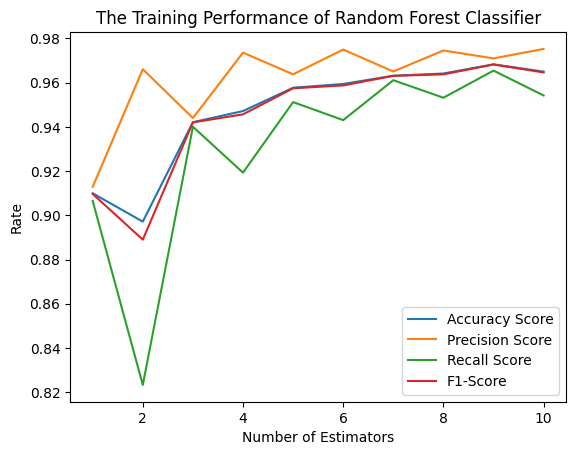

In [71]:
# Plotting the Training Performance
result_df = pd.DataFrame(t_result, columns=['num. of estimator', 'Accuracy', 'Precision','Recall',
                                          'F1-score'])
plt.plot(result_df['num. of estimator'], result_df['Accuracy'], label = 'Accuracy Score')
plt.plot(result_df['num. of estimator'], result_df['Precision'], label = 'Precision Score')
plt.plot(result_df['num. of estimator'], result_df['Recall'], label = 'Recall Score')
plt.plot(result_df['num. of estimator'], result_df['F1-score'], label = 'F1-Score')
plt.xlabel("Number of Estimators")
plt.ylabel("Rate")
plt.title("The Training Performance of Random Forest Classifier")
plt.legend()
plt.show()

In [72]:
result_df

num. of estimator  Accuracy  Precision    Recall  F1-score
0                  1  0.909938   0.912887  0.906461  0.909663
1                  2  0.897131   0.966067  0.823277  0.888975
2                  3  0.942102   0.943983  0.940043  0.942009
3                  4  0.947142   0.973571  0.919290  0.945652
4                  5  0.957693   0.963767  0.951186  0.957435
5                  6  0.959394   0.974970  0.943036  0.958737
6                  7  0.963119   0.965038  0.961092  0.963061
7                  8  0.964117   0.974543  0.953167  0.963736
8                  9  0.968264   0.970959  0.965434  0.968189
9                 10  0.964968   0.975241  0.954193  0.964602

In [73]:
# Training the RF on 10 estimator for best performance
%%time
RFModel = RandomForestClassifier(n_estimators= 10, criterion='entropy', n_jobs=-1)
RFModel.fit(X_train,y_train)

CPU times: user 4min 2s, sys: 626 ms, total: 4min 2s
Wall time: 2min 27s


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1)

### 6.2.1 Evaluating the Random Forest Classifier and Save results

In [74]:
y_predict = RFModel.predict(X_test)
print(classification_report(y_test,y_predict))    # Display the Testing Classification Report

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     71100
         1.0       0.98      0.96      0.97     71168

    accuracy                           0.97    142268
   macro avg       0.97      0.97      0.97    142268
weighted avg       0.97      0.97      0.97    142268



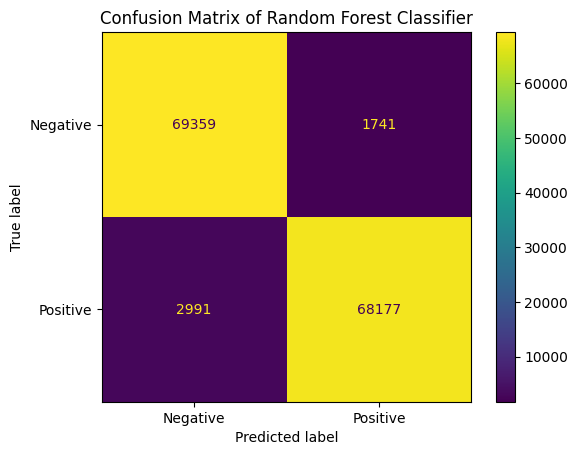

In [75]:
# Displaying the Confusion matrix of Random Forest Classifier
cm_matrix = confusion_matrix(y_test,y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Negative','Positive'])
cm_display.plot()
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()

True Negatives (TN): 69,359
The model correctly predicted Negative when the true label was Negative.

False Positives (FP): 1,741
The model predicted Positive, but the true label was actually Negative.

False Negatives (FN): 2,991
The model predicted Negative, but the true label was actually Positive.

True Positives (TP): 68,177
The model correctly predicted Positive when the true label was Positive.

In [76]:
# Saving the evaluation Result of Random Forest Classifier
RF_model_result = ['Random Forest Classifier',accuracy_score(y_test,y_predict),
              precision_score(y_test,y_predict), recall_score(y_test,y_predict),
              f1_score(y_test,y_predict)]

result.loc[len(result)] = RF_model_result           # add  RF_model_result to result

In [77]:
RF_model_result

['Random Forest Classifier',
 0.9667388309387915,
 0.9750994021568122,
 0.957972684352518,
 0.9664601732276767]

In [78]:
# show available results
result

Model Name  Accuracy  Precision Score  Recall Score  F1-Score
0  Random Forest Classifier  0.966739         0.975099      0.957973   0.96646

## 6.3 Logistic Regression
The hyperparameters will be tuning in order to get the best number of C Regularization that could affects the accuracy

In [79]:
# Hyperparameter Tuning for C regurlarization in order to get best training performance
'''t_result = []
itr = 0.1
while itr <= 1.00:
    LGR_Model = LogisticRegression(penalty='l2', dual=False, C=itr, fit_intercept=True
                        , random_state = 41, solver = 'sag', max_iter=1000)
    LGR_Model.fit(X_train, y_train)

    y_predict = LGR_Model.predict(X_test)

    t_result.append((itr,accuracy_score(y_test,y_predict), precision_score(y_test,y_predict),
                    recall_score(y_test,y_predict), f1_score(y_test,y_predict)))
    itr += 0.1'''

"t_result = []\nitr = 0.1\nwhile itr <= 1.00:\n    LGR_Model = LogisticRegression(penalty='l2', dual=False, C=itr, fit_intercept=True\n                        , random_state = 41, solver = 'sag', max_iter=1000)\n    LGR_Model.fit(X_train, y_train)\n\n    y_predict = LGR_Model.predict(X_test)\n\n    t_result.append((itr,accuracy_score(y_test,y_predict), precision_score(y_test,y_predict),\n                    recall_score(y_test,y_predict), f1_score(y_test,y_predict)))\n    itr += 0.1"

In [80]:
# Hyperparameter Tuning for C regurlarization in order to get best training performance
t_result = []
for C in np.arange(0.1, 1.1, 0.1):
    LGR_Model = LogisticRegression(penalty='l2', dual=False, C=C, fit_intercept=True,
                                   random_state=41, solver='sag', max_iter=500)
    LGR_Model.fit(X_train, y_train)
    y_predict = LGR_Model.predict(X_test)
    t_result.append((C, accuracy_score(y_test, y_predict),
                     precision_score(y_test, y_predict),
                     recall_score(y_test, y_predict),
                     f1_score(y_test, y_predict)))


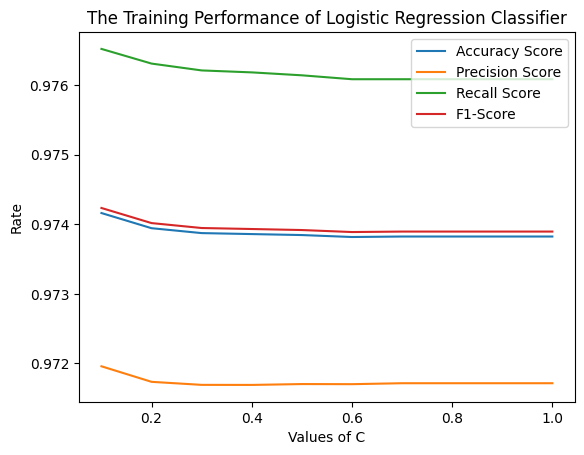

In [81]:
LGR_result_df = pd.DataFrame(t_result, columns=['C', 'Accuracy', 'Precision','Recall',
                                          'F1-score'])
plt.plot(LGR_result_df['C'], LGR_result_df['Accuracy'], label = 'Accuracy Score')
plt.plot(LGR_result_df['C'], LGR_result_df['Precision'], label = 'Precision Score')
plt.plot(LGR_result_df['C'], LGR_result_df['Recall'], label = 'Recall Score')
plt.plot(LGR_result_df['C'], LGR_result_df['F1-score'], label = 'F1-Score')
plt.xlabel("Values of C")
plt.ylabel("Rate")
plt.title("The Training Performance of Logistic Regression Classifier")
plt.legend()
plt.show()

In [82]:
LGR_result_df

C  Accuracy  Precision    Recall  F1-score
0  0.1  0.974161   0.971959  0.976520  0.974234
1  0.2  0.973944   0.971735  0.976310  0.974017
2  0.3  0.973873   0.971692  0.976211  0.973946
3  0.4  0.973859   0.971691  0.976183  0.973932
4  0.5  0.973845   0.971704  0.976141  0.973917
5  0.6  0.973817   0.971702  0.976085  0.973888
6  0.7  0.973824   0.971716  0.976085  0.973895
7  0.8  0.973824   0.971716  0.976085  0.973895
8  0.9  0.973824   0.971716  0.976085  0.973895
9  1.0  0.973824   0.971716  0.976085  0.973895

In [83]:
# Training the Logistic Regression for C = 0.1 for best performance
LGR_Model = LogisticRegression(penalty='l2', dual=False, C=0.1, fit_intercept=True
                        , random_state = 41, solver = 'sag', max_iter=500)

LGR_Model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=500, random_state=41, solver='sag')

### 6.3.1 Evaluating The Logistic Regressions and Save Results

In [84]:
y_predict = LGR_Model.predict(X_test)
print(classification_report(y_test,y_predict))    # Display the Testing Classification Report

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     71100
         1.0       0.97      0.98      0.97     71168

    accuracy                           0.97    142268
   macro avg       0.97      0.97      0.97    142268
weighted avg       0.97      0.97      0.97    142268



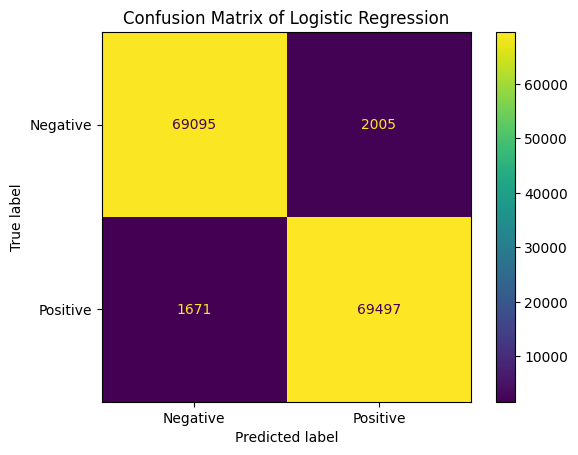

In [85]:
# Displaying the Confusion matrix of Logistic Regression
cm_matrix = confusion_matrix(y_test,y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Negative','Positive'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

TN (69,095): Correctly predicted Negative.

FP (2005): Mistakenly predicted as Positive.

FN (1,671): Missed Positive, predicted as Negative.

TP (69497): Correctly predicted Positive.

In [86]:
# Saving the evaluation Result of Logistic Regresion
LGR_model_result = ['Logistic Regression',accuracy_score(y_test,y_predict),
              precision_score(y_test,y_predict), recall_score(y_test,y_predict),
              f1_score(y_test,y_predict)]

result.loc[len(result)] = LGR_model_result         # add  LGR_model_result to result

In [87]:
# show available results
result

Model Name  Accuracy  Precision Score  Recall Score  F1-Score
0  Random Forest Classifier  0.966739         0.975099      0.957973  0.966460
1       Logistic Regression  0.974161         0.971959      0.976520  0.974234

## 6.4 Multinomial Naive Bayes

The Multinomial Naive Bayes will be used since it is suitable for TF-IDF counts, there is not too much parameters to adjust, so a basic MultinomialNB will be used .

> The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

[sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [88]:
NB_Model = MultinomialNB()
NB_Model.fit(X_train,y_train)

MultinomialNB()

In [89]:
print("\t\tThe Evaluation Classification Report")
y_predict= NB_Model.predict(X_test)
print(classification_report(y_test,y_predict))    # Display the Testing Classification Report

		The Evaluation Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     71100
         1.0       0.89      0.88      0.88     71168

    accuracy                           0.89    142268
   macro avg       0.89      0.89      0.89    142268
weighted avg       0.89      0.89      0.89    142268



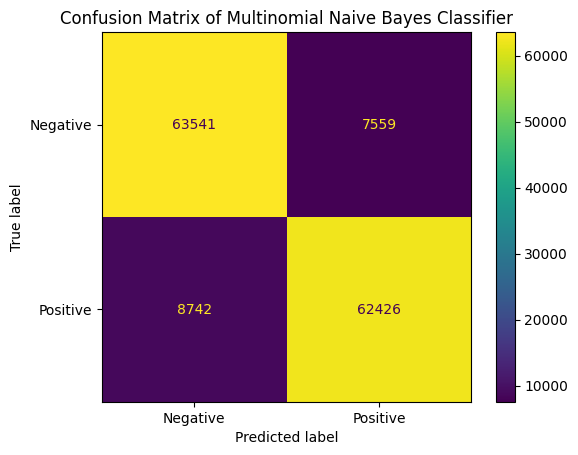

In [90]:
# Displaying the Confusion matrix of Multinomial Naive Bayes
cm_matrix = confusion_matrix(y_test,y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Negative','Positive'])
cm_display.plot()
plt.title("Confusion Matrix of Multinomial Naive Bayes Classifier")
plt.show()

TN (63,541): Correctly predicted Negative.

FP (7,559): Mistakenly predicted as Positive.

FN (8,742): Missed Positive, predicted as Negative.

TP (62,426): Correctly predicted Positive.

In [91]:
# Saving the evaluation Result of Multinomial Naive Bayes
NB_model_result = ['MultinomialNB',accuracy_score(y_test,y_predict),
              precision_score(y_test,y_predict), recall_score(y_test,y_predict),
              f1_score(y_test,y_predict)]
result.loc[len(result)] = NB_model_result

In [92]:
# show available results
result

Model Name  Accuracy  Precision Score  Recall Score  F1-Score
0  Random Forest Classifier  0.966739         0.975099      0.957973  0.966460
1       Logistic Regression  0.974161         0.971959      0.976520  0.974234
2             MultinomialNB  0.885420         0.891991      0.877164  0.884515

## 6.5 Decision Tree Classifier

In [93]:
# basic hyperparameters is chosen for the DTClassifier, with entropy criterion
DT_Model = DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [94]:
# Display the Testing Classification Report
y_predict = DT_Model.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     71100
         1.0       0.91      0.91      0.91     71168

    accuracy                           0.91    142268
   macro avg       0.91      0.91      0.91    142268
weighted avg       0.91      0.91      0.91    142268



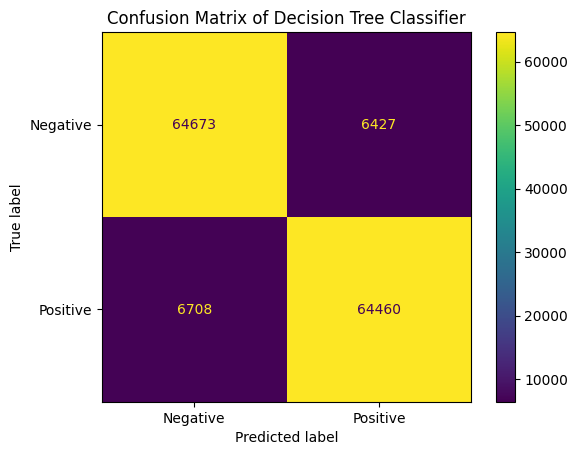

In [95]:
# Displaying the Confusion matrix of Decision Tree Classifier
cm_matrix = confusion_matrix(y_test,y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Negative','Positive'])
cm_display.plot()
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

TN (64,673): Correctly predicted Negative.

FP (6,427): Mistakenly predicted as Positive.

FN (6,708): Missed Positive, predicted as Negative.

TP (64,460): Correctly predicted Positive.

In [96]:
# Saving the evaluation Result of DecisionTreeClassifier
DT_model_result = ['DecisionTree',accuracy_score(y_test,y_predict),
              precision_score(y_test,y_predict), recall_score(y_test,y_predict),
              f1_score(y_test,y_predict)]
result.loc[len(result)] = DT_model_result

In [97]:
# show available results
result

Model Name  Accuracy  Precision Score  Recall Score  F1-Score
0  Random Forest Classifier  0.966739         0.975099      0.957973  0.966460
1       Logistic Regression  0.974161         0.971959      0.976520  0.974234
2             MultinomialNB  0.885420         0.891991      0.877164  0.884515
3              DecisionTree  0.907674         0.909335      0.905744  0.907536

## 6.6 Linear Support-Vector Classifier

As the same for Logistic Regression, the HyperParameter C will be tuned to get possible best result

In [98]:
t_result = []

# Create an array for C values (faster than while loop!)
C_values = np.arange(0.1, 1.1, 0.1)

for C in C_values:
    # Initialize LinearSVC model with L2 penalty
    LSVC_Model = LinearSVC(penalty='l2', dual=False, C=C)

    # Train the model
    LSVC_Model.fit(X_train, y_train)

    # Predict on the TEST set for fair evaluation
    y_predict = LSVC_Model.predict(X_test)

    # Store metrics in a list
    t_result.append({
        'C': round(C, 2),
        'Accuracy': accuracy_score(y_test, y_predict),
        'Precision': precision_score(y_test, y_predict),
        'Recall': recall_score(y_test, y_predict),
        'F1-score': f1_score(y_test, y_predict)
    })

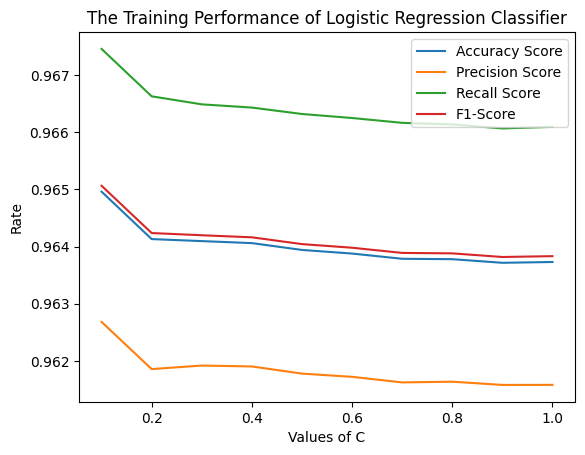

In [99]:
# Displaying the training performance
LSVC_result_df = pd.DataFrame(t_result, columns=['C', 'Accuracy', 'Precision','Recall',
                                          'F1-score'])
plt.plot(LSVC_result_df['C'], LSVC_result_df['Accuracy'], label = 'Accuracy Score')
plt.plot(LSVC_result_df['C'], LSVC_result_df['Precision'], label = 'Precision Score')
plt.plot(LSVC_result_df['C'], LSVC_result_df['Recall'], label = 'Recall Score')
plt.plot(LSVC_result_df['C'], LSVC_result_df['F1-score'], label = 'F1-Score')
plt.xlabel("Values of C")
plt.ylabel("Rate")
plt.title("The Training Performance of Logistic Regression Classifier")
plt.legend()
plt.show()

In [100]:
LSVC_result_df

C  Accuracy  Precision    Recall  F1-score
0  0.1  0.964960   0.962682  0.967457  0.965064
1  0.2  0.964131   0.961857  0.966628  0.964237
2  0.3  0.964096   0.961919  0.966488  0.964198
3  0.4  0.964061   0.961904  0.966432  0.964162
4  0.5  0.963941   0.961778  0.966319  0.964043
5  0.6  0.963878   0.961722  0.966249  0.963980
6  0.7  0.963787   0.961625  0.966165  0.963889
7  0.8  0.963780   0.961637  0.966136  0.963881
8  0.9  0.963716   0.961580  0.966066  0.963818
9  1.0  0.963730   0.961581  0.966094  0.963833

Looks like it is Stable !

In [101]:
# Training the Linear SVC for C = 0.1 for best performance
LSVC_Model = LinearSVC(penalty='l2',dual=False, C=0.1)
LSVC_Model.fit(X_train,y_train)

LinearSVC(C=0.1, dual=False)

### 6.6.1 Evaluating The Linear Support-Vector Classifier and Save Results

In [102]:
y_predict = LSVC_Model.predict(X_test)
print(classification_report(y_test,y_predict))    # Display the Testing Classification Report

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     71100
         1.0       0.96      0.97      0.97     71168

    accuracy                           0.96    142268
   macro avg       0.96      0.96      0.96    142268
weighted avg       0.96      0.96      0.96    142268



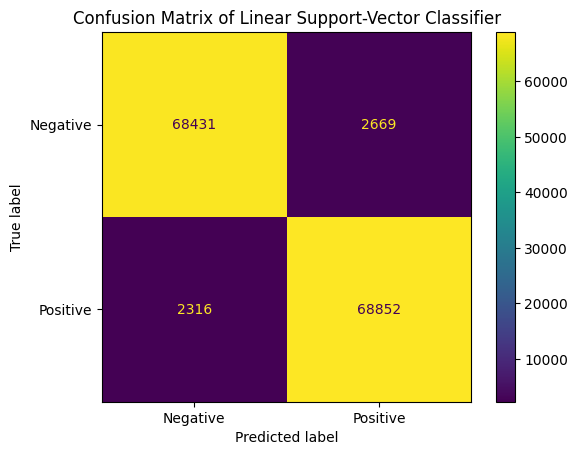

In [103]:
# Displaying the Confusion matrix of Linear SVC
cm_matrix = confusion_matrix(y_test,y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Negative','Positive'])
cm_display.plot()
plt.title("Confusion Matrix of Linear Support-Vector Classifier")
plt.show()

TN (68,431): Correctly predicted Negative.

FP (2,669): Mistakenly predicted as Positive.

FN (2,316): Missed Positive, predicted as Negative.

TP (68,852): Correctly predicted Positive.

In [104]:
# Saving the evaluation Result of Linear SVC
LSVC_model_result = ['Linear SVC',accuracy_score(y_test,y_predict),
              precision_score(y_test,y_predict), recall_score(y_test,y_predict),
              f1_score(y_test,y_predict)]
result.loc[len(result)] = LSVC_model_result

# 7. Evaluation & Comparison

In [105]:
# First, Displaying the DataFrame contains the Testing Performance of each Model
result

Model Name  Accuracy  Precision Score  Recall Score  F1-Score
0  Random Forest Classifier  0.966739         0.975099      0.957973  0.966460
1       Logistic Regression  0.974161         0.971959      0.976520  0.974234
2             MultinomialNB  0.885420         0.891991      0.877164  0.884515
3              DecisionTree  0.907674         0.909335      0.905744  0.907536
4                Linear SVC  0.964960         0.962682      0.967457  0.965064

## 7.1 Comparison based on Accuracy

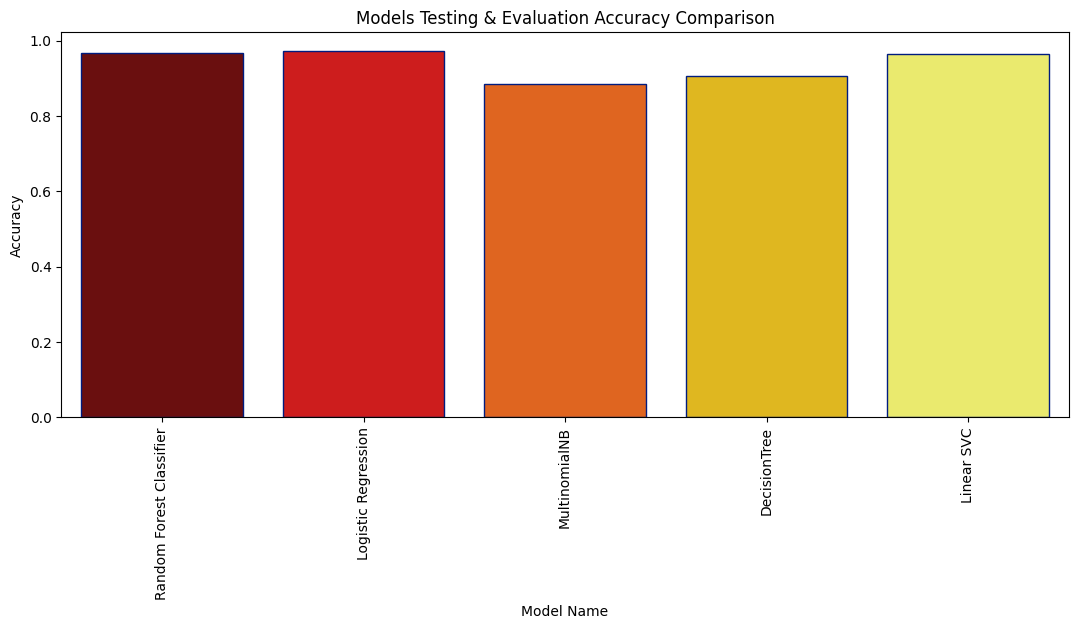

In [106]:
# Displaying a bar to compare between Models according to their Accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="Model Name", y="Accuracy",data=result,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Accuracy Comparison')
plt.show()

## 7.2 Comparison based on Precision

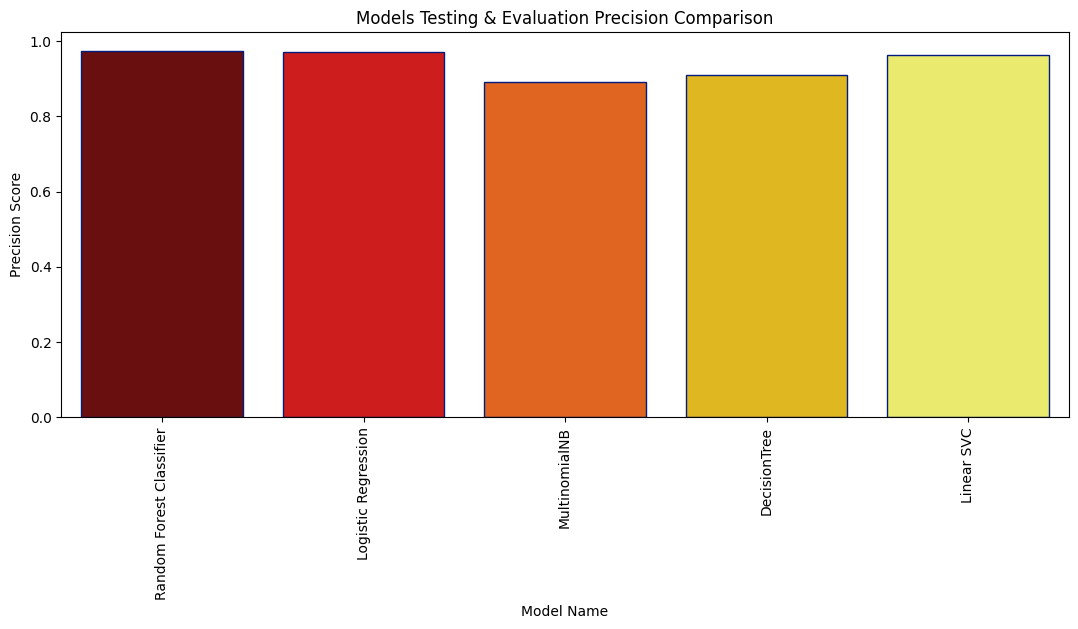

In [107]:
# Displaying a bar to compare between Models according to their Precision
plt.subplots(figsize=(13,5))
sns.barplot(x="Model Name", y="Precision Score",data=result,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Precision Comparison')
plt.show()

## 7.3 Comparison based on Recall

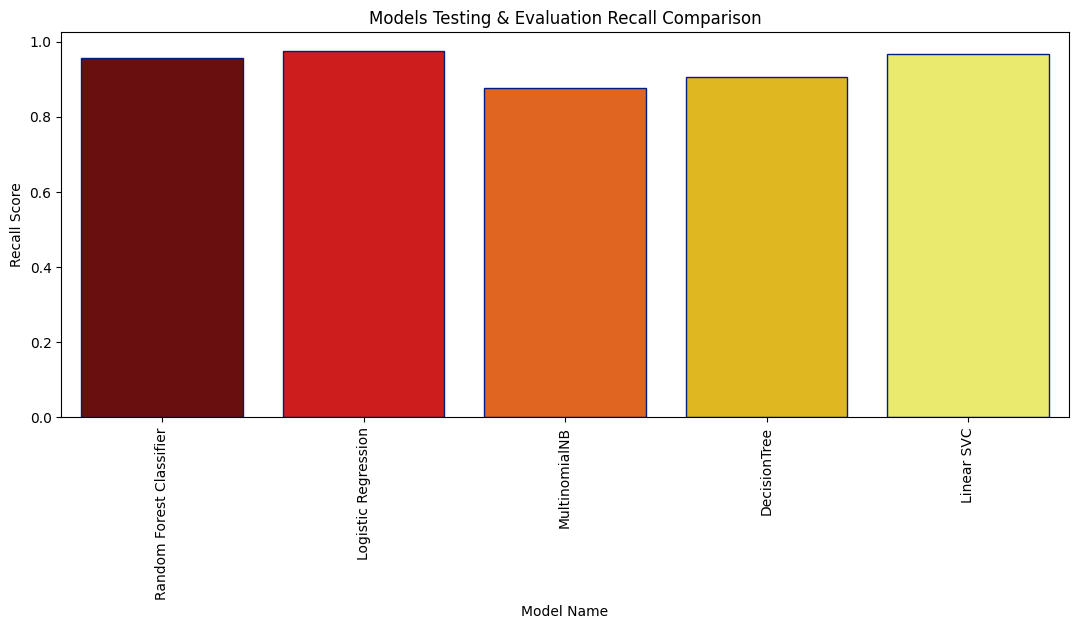

In [108]:
# Displaying a bar to compare between Models according to their Recall
plt.subplots(figsize=(13,5))
sns.barplot(x="Model Name", y="Recall Score",data=result,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Recall Comparison')
plt.show()

## 7.4 Comparison based on F1-Score

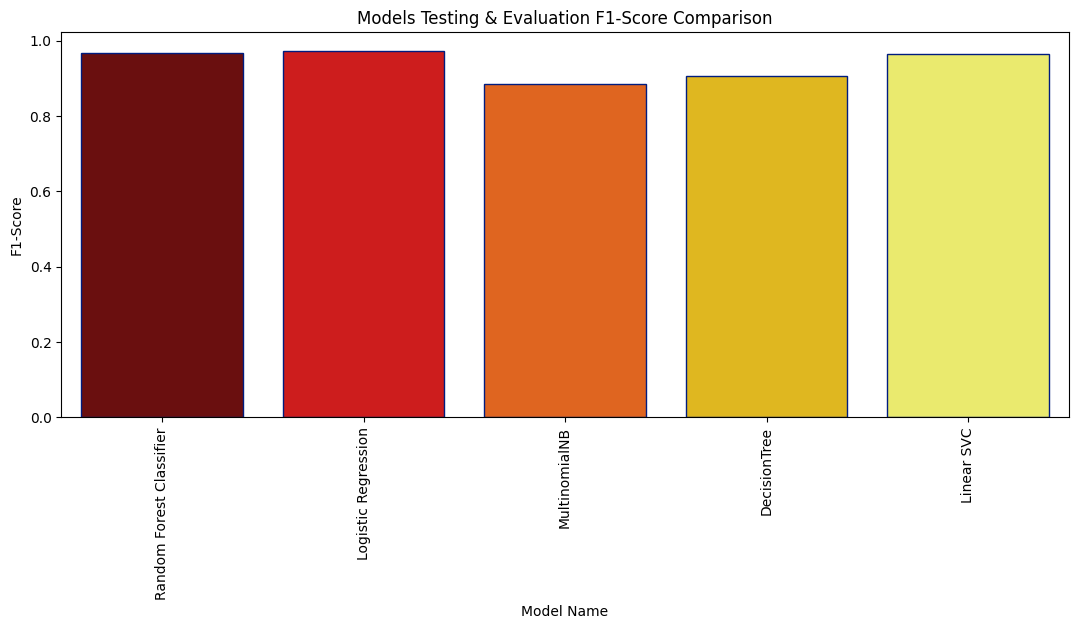

In [109]:
# Displaying a bar to compare between Models according to their F1-score
plt.subplots(figsize=(13,5))
sns.barplot(x="Model Name", y="F1-Score",data=result,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation F1-Score Comparison')
plt.show()

The Logistic Regression Classifier looks stable and providing the **BEST** evaluation performance, adding to its training perfromance displayed before.

So, we are on our way to use Logistic Regression Classifier for our Problem .

In [110]:
# Putting All together in Pipeline
LGR_pipe = Pipeline([('vectorizer',vectorizer),('LGR',LGR_Model)])                    # # Step 1: Convert raw text to numbers using TF-IDF
                                                                                # Step 2: Apply Logistic Regression on that numeric data

# Saving the Pipeline for Later using
pickle.dump(LGR_pipe, open('LGR_Model.sav', 'wb'))

# 8. Trying & Testing

# Function to Preprocess the sentence

In [111]:
# Function to remove stop words
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in sentence.split() if word not in stop_words])

# Function for lemmatization
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Function to remove specific symbols using regex
def remove_symbols(sentence):
    # Remove symbols (.?><:;"_/*) specifically
    return re.sub(r'[.?!@#$^&()-><:;"_/*]', '', sentence)

# Function to clean and preprocess the sentence
def preprocess_sentence(sentence):
    # Lowercasing
    lower_sen = sentence.lower()

    # Remove symbols (.?><:;"_/*)
    cleaned_sentence = remove_symbols(lower_sen)

    # Remove stop words
    cleaned_sentence = remove_stopwords(cleaned_sentence)

    # Tokenizing
    tken_sentence = word_tokenize(cleaned_sentence)

    # Lemmatization
    lemmatized_sen = lemmatization(tken_sentence)

    # Rejoining the tokens into a cleaned sentence
    processed_sen = ' '.join(lemmatized_sen)

    return processed_sen

In [112]:
# Example usage
LGR_Model = pickle.load(open('LGR_Model.sav','rb'))                   # Loading our model
Sentence = "I Regret buying this; it doesn’t work as advertised."     # The sentence to be tested
processed_sen = preprocess_sentence(Sentence)                         # processed_sen


print("processed_sen = " ,(processed_sen))
# Go through the pipeline (Vectorizing & Predict)
sentiment = LGR_Model.predict([processed_sen])
if sentiment[0] == 1:
    print(Sentence, '(is Positive)')
else:
    print(Sentence, '(is Negative)')


processed_sen =  regret buying doesn ’ t work advertised
I Regret buying this; it doesn’t work as advertised. (is Negative)


In [113]:
# Another example usage
LGR_Model = pickle.load(open('LGR_Model.sav','rb'))                   # Loading our model
Sentence ='Kaggle is the most wonderful platforms ever !'             # The sentence to be tested
processed_sen = preprocess_sentence(Sentence)                         # processed_sen


print("processed_sen = " ,(processed_sen))
# Go through the pipeline (Vectorizing & Predict)
sentiment = LGR_Model.predict([processed_sen])
if sentiment[0] == 1:
    print(Sentence, '(is Positive)')
else:
    print(Sentence, '(is Negative)')


processed_sen =  kaggle wonderful platform ever
Kaggle is the most wonderful platforms ever ! (is Positive)


It seems to be worked very well :)

# 9. Deployment

# End Of The Notebook